#### Carregando as importações

In [1]:
import import_ipynb
from preprocessing_smote_RGB import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *

importing Jupyter notebook from preprocessing_smote_RGB.ipynb
importing Jupyter notebook from preprocessing_RGB.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_preprocessing.ipynb
importing Jupyter notebook from load_dataset_RGB.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
X:  6400
X_train:  4480
X_test:  1280
X_val:  640
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([ 627,   45, 2240, 1568], dtype=int64))
(array([0, 1, 2, 3], dtype=int64), array([ 627,   45, 2240, 1568], dtype=int64))
(array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18'), array([179,  13, 640, 448], dtype=int64))
(array([0, 1, 2, 3]), array([179,  13, 640, 448], dtype=int64))
(array([0, 1, 2, 3]), array([179,  13, 640, 

c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb


In [2]:
Modelos =  []
Loss = []
Acuracia =  []
Precisao = []
Revocacao =  []
F1_score =  []

In [3]:
# Define a arquitetura da CNN
model_1 = Sequential([
    Conv2D(25, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [4]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_1 = model_1.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 151s 1s/step - loss: 1.0400 - accuracy: 0.5051 - precision: 0.5538 - recall: 0.3136 - f1_score: 0.1725 - val_loss: 0.9625 - val_accuracy: 0.5594 - val_precision: 0.7739 - val_recall: 0.2781 - val_f1_score: 0.1618
Epoch 2/30
140/140 [==============================] - 150s 1s/step - loss: 0.8534 - accuracy: 0.6112 - precision: 0.6815 - recall: 0.4781 - f1_score: 0.3366 - val_loss: 0.7980 - val_accuracy: 0.6594 - val_precision: 0.7008 - val_recall: 0.5781 - val_f1_score: 0.3250
Epoch 3/30
140/140 [==============================] - 150s 1s/step - loss: 0.5667 - accuracy: 0.7667 - precision: 0.8048 - recall: 0.7058 - f1_score: 0.6126 - val_loss: 0.4598 - val_accuracy: 0.8094 - val_precision: 0.8292 - val_recall: 0.7812 - val_f1_score: 0.8085
Epoch 4/30
140/140 [==============================] - 144s 1s/step - loss: 0.2722 - accuracy: 0.9045 - precision: 0.9121 - recall: 0.8935 - f1_score: 0.9201 - val_loss: 0.3639 - val_accuracy: 0.8484 

In [5]:
# Avaliar o modelo no conjunto de teste
result_model_1 = model_1.evaluate(X_test, y_test_categorical)
print('Test:', result_model_1)

40/40 [==============================] - 5s 135ms/step - loss: 0.0981 - accuracy: 0.9695 - precision: 0.9703 - recall: 0.9695 - f1_score: 0.9764
Test: [0.09809079766273499, 0.969531238079071, 0.9702892899513245, 0.969531238079071, 0.9763518571853638]


In [6]:
loss, accuracy, precision, recall, f1_score  = result_model_1
Modelos.append('Modelo01')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 25)      700       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

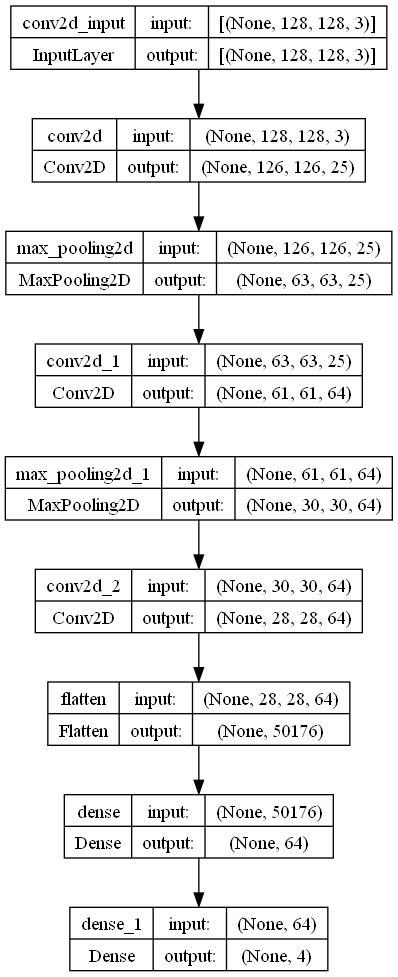

In [8]:
plot_model(model_1, to_file = './images/arquitetura01_RGB_smote.png', show_shapes = True)

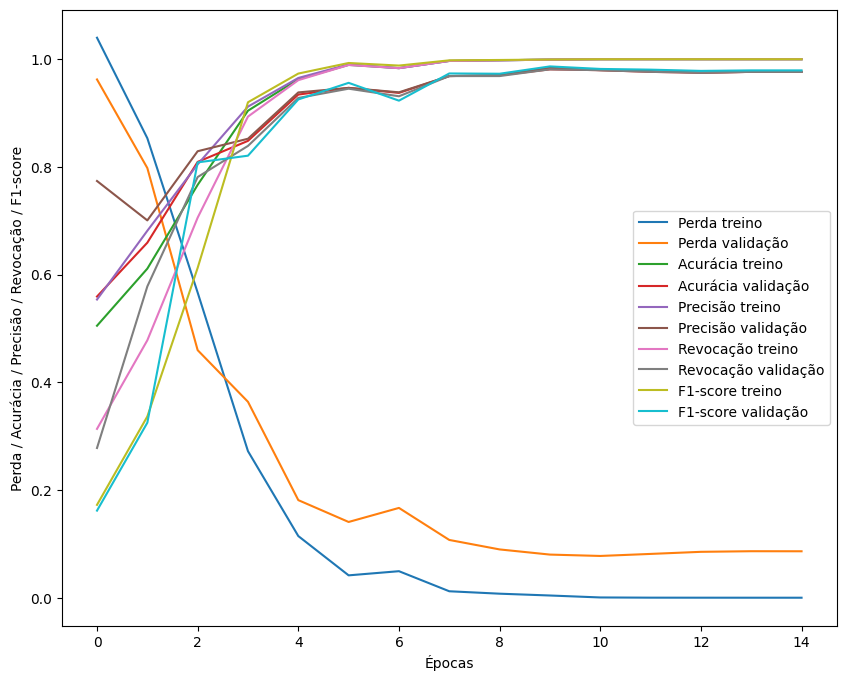

In [9]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_1.history['loss'], label='Perda treino')
plt.plot(history_model_1.history['val_loss'], label='Perda validação')
plt.plot(history_model_1.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_1.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_1.history['precision'], label='Precisão treino')
plt.plot(history_model_1.history['val_precision'], label='Precisão validação')
plt.plot(history_model_1.history['recall'], label='Revocação treino')
plt.plot(history_model_1.history['val_recall'], label='Revocação validação')
plt.plot(history_model_1.history['f1_score'], label='F1-score treino')
plt.plot(history_model_1.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo01_grafico_RGB_smote.png', format='png')
plt.show()

In [10]:
# Define a arquitetura da CNN
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [11]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_2 = model_2.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 93s 652ms/step - loss: 1.0027 - accuracy: 0.5270 - precision: 0.7294 - recall: 0.4821 - f1_score: 0.4624 - val_loss: 0.8994 - val_accuracy: 0.6000 - val_precision: 0.6519 - val_recall: 0.5063 - val_f1_score: 0.3030
Epoch 2/30
140/140 [==============================] - 82s 584ms/step - loss: 0.8507 - accuracy: 0.6112 - precision: 0.6804 - recall: 0.4819 - f1_score: 0.3229 - val_loss: 0.7785 - val_accuracy: 0.6406 - val_precision: 0.7229 - val_recall: 0.5422 - val_f1_score: 0.3331
Epoch 3/30
140/140 [==============================] - 83s 595ms/step - loss: 0.6404 - accuracy: 0.7212 - precision: 0.7753 - recall: 0.6545 - f1_score: 0.4831 - val_loss: 0.5882 - val_accuracy: 0.7578 - val_precision: 0.7883 - val_recall: 0.7156 - val_f1_score: 0.5287
Epoch 4/30
140/140 [==============================] - 83s 590ms/step - loss: 0.3667 - accuracy: 0.8565 - precision: 0.8734 - recall: 0.8346 - f1_score: 0.7555 - val_loss: 0.3868 - val_accuracy:

In [12]:
# Avaliar o modelo no conjunto de teste
result_model_2 = model_2.evaluate(X_test, y_test_categorical)
print('Test:', result_model_2)

40/40 [==============================] - 5s 114ms/step - loss: 0.1054 - accuracy: 0.9797 - precision: 0.9797 - recall: 0.9797 - f1_score: 0.9819
Test: [0.10539010912179947, 0.979687511920929, 0.979687511920929, 0.979687511920929, 0.9819352030754089]


In [13]:
loss, accuracy, precision, recall, f1_score  = result_model_2
Modelos.append('Modelo02')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

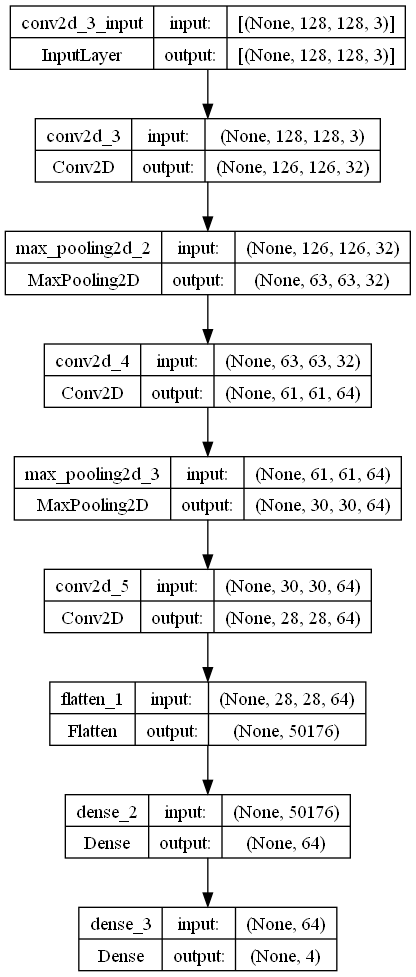

In [15]:
plot_model(model_2, to_file = './images/arquitetura02_RGB_smote.png', show_shapes = True)

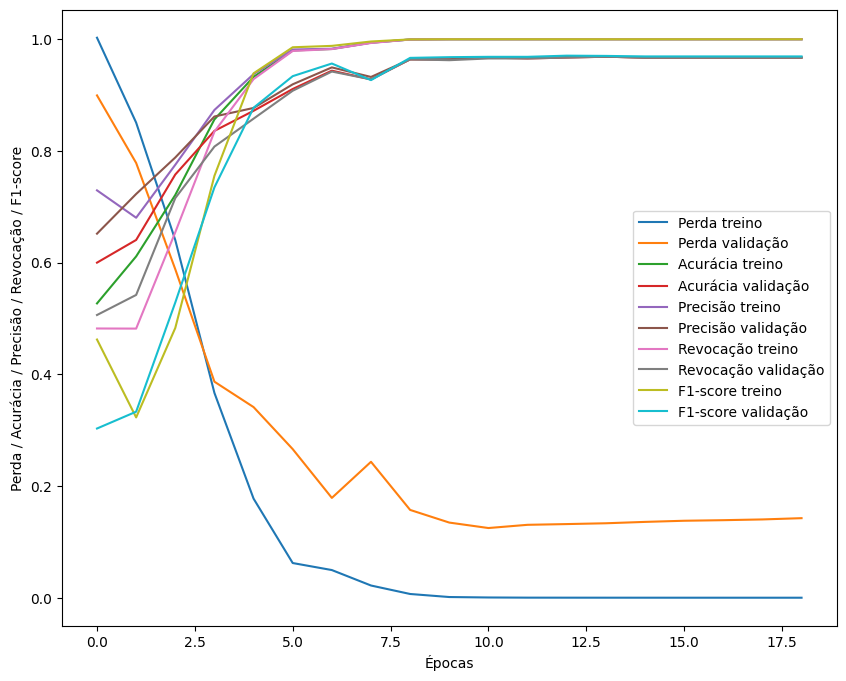

In [16]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_2.history['loss'], label='Perda treino')
plt.plot(history_model_2.history['val_loss'], label='Perda validação')
plt.plot(history_model_2.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_2.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_2.history['precision'], label='Precisão treino')
plt.plot(history_model_2.history['val_precision'], label='Precisão validação')
plt.plot(history_model_2.history['recall'], label='Revocação treino')
plt.plot(history_model_2.history['val_recall'], label='Revocação validação')
plt.plot(history_model_2.history['f1_score'], label='F1-score treino')
plt.plot(history_model_2.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo02_grafico_RGB_smote.png', format='png')
plt.show()

In [17]:
# Define a arquitetura da CNN
model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

In [18]:
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_3 = model_3.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 80s 564ms/step - loss: 1.0368 - accuracy: 0.5020 - precision: 0.7191 - recall: 0.4259 - f1_score: 0.4318 - val_loss: 0.9589 - val_accuracy: 0.5188 - val_precision: 0.6582 - val_recall: 0.3641 - val_f1_score: 0.1728
Epoch 2/30
140/140 [==============================] - 75s 535ms/step - loss: 0.8987 - accuracy: 0.5804 - precision: 0.6827 - recall: 0.4096 - f1_score: 0.2533 - val_loss: 0.8091 - val_accuracy: 0.6516 - val_precision: 0.7287 - val_recall: 0.5203 - val_f1_score: 0.3212
Epoch 3/30
140/140 [==============================] - 76s 544ms/step - loss: 0.7778 - accuracy: 0.6569 - precision: 0.7324 - recall: 0.5371 - f1_score: 0.3814 - val_loss: 0.7126 - val_accuracy: 0.6844 - val_precision: 0.7640 - val_recall: 0.5766 - val_f1_score: 0.4301
Epoch 4/30
140/140 [==============================] - 80s 570ms/step - loss: 0.5932 - accuracy: 0.7455 - precision: 0.7929 - recall: 0.6897 - f1_score: 0.5608 - val_loss: 0.5838 - val_accuracy:

In [19]:
# Avaliar o modelo no conjunto de teste
result_model_3 = model_3.evaluate(X_test, y_test_categorical)
print('Test:', result_model_3)

40/40 [==============================] - 4s 110ms/step - loss: 0.1515 - accuracy: 0.9625 - precision: 0.9624 - recall: 0.9609 - f1_score: 0.9673
Test: [0.15148727595806122, 0.9624999761581421, 0.9624413251876831, 0.9609375, 0.9672996997833252]


In [20]:
loss, accuracy, precision, recall, f1_score  = result_model_3
Modelos.append('Modelo03')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)      

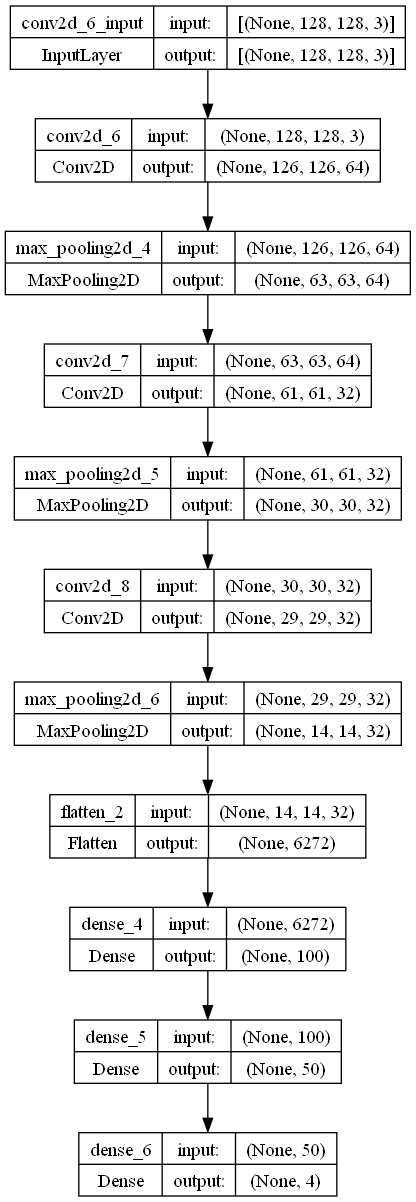

In [22]:
plot_model(model_3, to_file = './images/arquitetura03_RGB_smote.png', show_shapes = True)

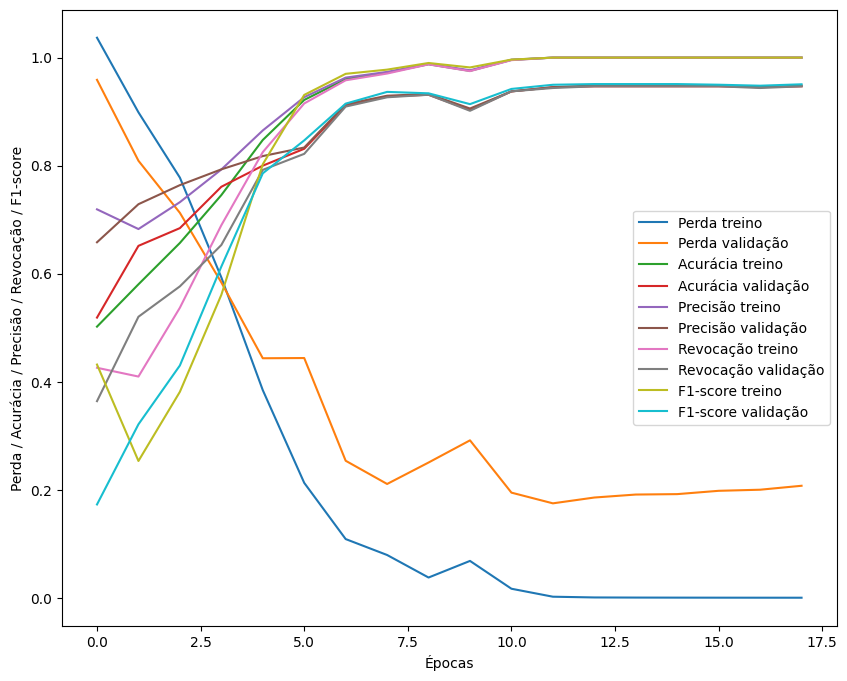

In [23]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_3.history['loss'], label='Perda treino')
plt.plot(history_model_3.history['val_loss'], label='Perda validação')
plt.plot(history_model_3.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_3.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_3.history['precision'], label='Precisão treino')
plt.plot(history_model_3.history['val_precision'], label='Precisão validação')
plt.plot(history_model_3.history['recall'], label='Revocação treino')
plt.plot(history_model_3.history['val_recall'], label='Revocação validação')
plt.plot(history_model_3.history['f1_score'], label='F1-score treino')
plt.plot(history_model_3.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo03_grafico_RGB_smote.png', format='png')
plt.show()

In [24]:
model_4 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [25]:
model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

# Treina o modelo
history_model_4 = model_4.fit(X_train, y_train_categorical, epochs = EPOCHS, validation_data = dataset_validation_categorical, callbacks=[early_stop])

Epoch 1/30
140/140 [==============================] - 255s 2s/step - loss: 1.0691 - accuracy: 0.5031 - precision: 0.7063 - recall: 0.4526 - f1_score: 0.4402 - val_loss: 0.9500 - val_accuracy: 0.5391 - val_precision: 0.7553 - val_recall: 0.2797 - val_f1_score: 0.1607
Epoch 2/30
140/140 [==============================] - 86s 612ms/step - loss: 0.9257 - accuracy: 0.5580 - precision: 0.6741 - recall: 0.3578 - f1_score: 0.2115 - val_loss: 0.8458 - val_accuracy: 0.6203 - val_precision: 0.7456 - val_recall: 0.3938 - val_f1_score: 0.2436
Epoch 3/30
140/140 [==============================] - 85s 603ms/step - loss: 0.8082 - accuracy: 0.6223 - precision: 0.7113 - recall: 0.4783 - f1_score: 0.3511 - val_loss: 0.7604 - val_accuracy: 0.6547 - val_precision: 0.8040 - val_recall: 0.4422 - val_f1_score: 0.3863
Epoch 4/30
140/140 [==============================] - 83s 596ms/step - loss: 0.6556 - accuracy: 0.7132 - precision: 0.7603 - recall: 0.6286 - f1_score: 0.4936 - val_loss: 0.5639 - val_accuracy: 0

In [26]:
# Avaliar o modelo no conjunto de teste
result_model_4 = model_4.evaluate(X_test, y_test_categorical)
print('Test:', result_model_4)

40/40 [==============================] - 10s 255ms/step - loss: 0.1057 - accuracy: 0.9656 - precision: 0.9663 - recall: 0.9641 - f1_score: 0.9707
Test: [0.10573609173297882, 0.965624988079071, 0.9663273096084595, 0.964062511920929, 0.9707132577896118]


In [27]:
loss, accuracy, precision, recall, f1_score  = result_model_4
Modelos.append('Modelo04')
Acuracia.append(accuracy)
Loss.append(loss)
Precisao.append(precision)
Revocacao.append(recall)
F1_score.append(f1_score)

In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)     

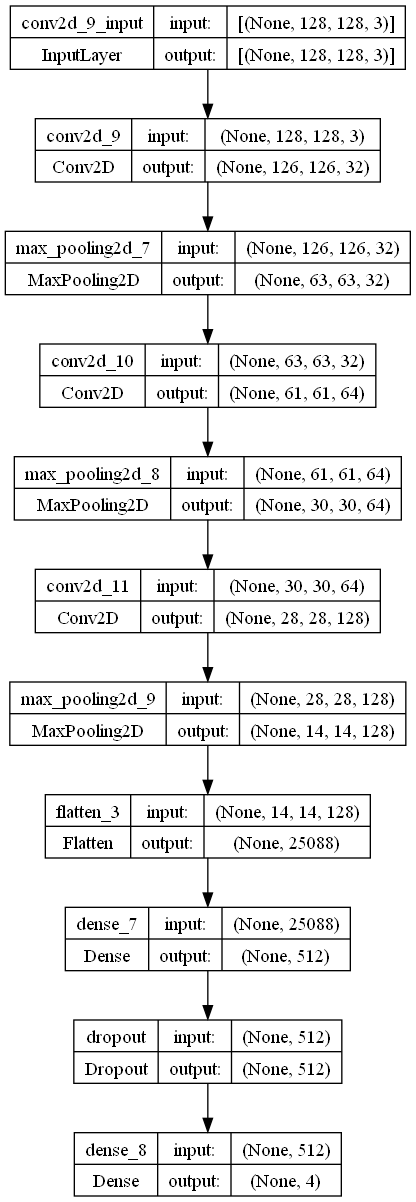

In [29]:
plot_model(model_4, to_file = './images/arquitetura04_RGB_smote.png', show_shapes = True)

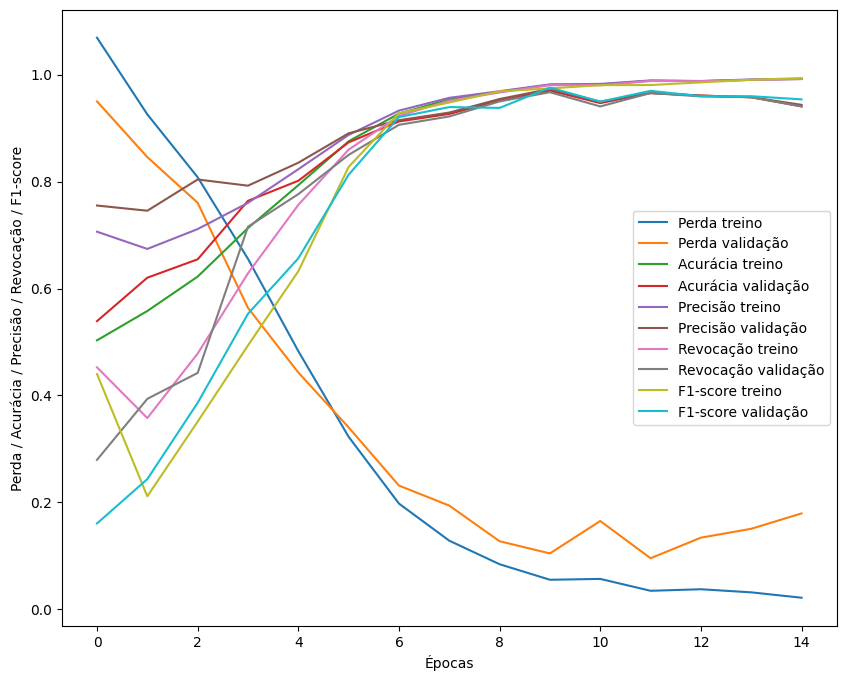

In [30]:
# Plota os gráficos de perda e acurácia
plt.figure(figsize = (10, 8))
plt.plot(history_model_4.history['loss'], label='Perda treino')
plt.plot(history_model_4.history['val_loss'], label='Perda validação')
plt.plot(history_model_4.history['accuracy'], label='Acurácia treino')
plt.plot(history_model_4.history['val_accuracy'], label='Acurácia validação')
plt.plot(history_model_4.history['precision'], label='Precisão treino')
plt.plot(history_model_4.history['val_precision'], label='Precisão validação')
plt.plot(history_model_4.history['recall'], label='Revocação treino')
plt.plot(history_model_4.history['val_recall'], label='Revocação validação')
plt.plot(history_model_4.history['f1_score'], label='F1-score treino')
plt.plot(history_model_4.history['val_f1_score'], label='F1-score validação')
plt.xlabel('Épocas')
plt.ylabel('Perda / Acurácia / Precisão / Revocação / F1-score')
plt.legend()
plt.savefig('images\modelo04_grafico_RGB_smote.png', format='png')
plt.show()